In [1]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm

In [2]:
np.std(ff.read_min('000001.SZ').iloc[0:240,5])

16121797.6626365

In [3]:
time_index = (ff.read('close').loc[:,'20200101':'20240101']).columns
stock_index = list(ff.read('close').index)

In [4]:
data = ff.read_min('000002.SZ')['volume'].rolling(240).std()
day_data = data[data.index.str.endswith('15:00:00')]
day_data.index = pd.to_datetime(day_data.index).strftime('%Y%m%d')
pd.Series(day_data.rolling(20).std() / day_data.rolling(20).mean(),index = time_index)

20200102         NaN
20200103         NaN
20200106         NaN
20200107         NaN
20200108         NaN
              ...   
20231225    0.463114
20231226    0.482915
20231227    0.513587
20231228    0.498498
20231229    0.491856
Name: volume, Length: 970, dtype: float64

In [5]:
def viola(stock):
    try:
        data = ff.read_min(stock)['volume'].rolling(240).std()
        day_data = data[data.index.str.endswith('15:00:00')]
        day_data.index = pd.to_datetime(day_data.index).strftime('%Y%m%d')
        return pd.Series(day_data.rolling(20).std() / day_data.rolling(20).mean(),index = time_index).values
    except:
        return pd.Series(np.nan,index = time_index).values
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(viola,stock_index),total = len(stock_index)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5545/5545 [00:41<00:00, 134.61it/s]


In [6]:
viodata = pd.DataFrame(np.vstack(res_lst),index = stock_index,columns=time_index)

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


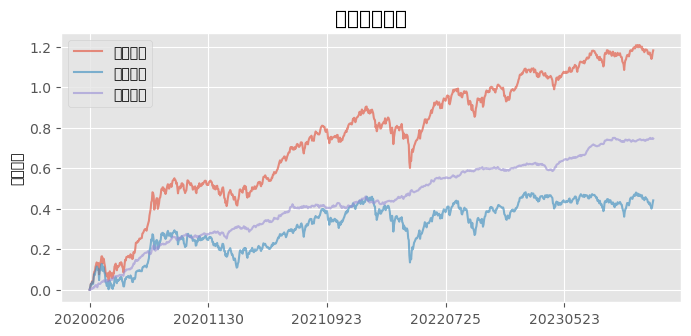

,指数收益,超额收益,策略收益
年化收益率,0.116,0.196,0.311
年化波动率,0.195,0.063,0.211
夏普率,0.595,3.140,1.472
最大回撤,-0.325,-0.041,-0.303
收益回撤比,0.357,4.790,1.024
胜率,0.535,0.593,0.579
盈亏比,0.959,1.166,0.930


(        指数收益   超额收益   策略收益
 年化收益率  0.116  0.196  0.311
 年化波动率  0.195  0.063  0.211
 夏普率    0.595  3.140  1.472
 最大回撤  -0.325 -0.041 -0.303
 收益回撤比  0.357  4.790  1.024
 胜率     0.535  0.593  0.579
 盈亏比    0.959  1.166  0.930,
                 策略     index          策略收益      指数收益      超额收益
 20200206  1.000000  1.000000  6.661338e-16  0.000000  0.000000
 20200207  1.009875  1.011439  9.826930e-03  0.011374 -0.001565
 20200210  1.028343  1.027101  2.794863e-02  0.026740  0.001233
 20200211  1.028781  1.021528  2.837506e-02  0.021300  0.007069
 20200212  1.042452  1.037904  4.157533e-02  0.037203  0.004322
 ...            ...       ...           ...       ...       ...
 20231225  3.168681  1.512281  1.153315e+00  0.413619  0.745119
 20231226  3.127353  1.492696  1.140187e+00  0.400584  0.745027
 20231227  3.153021  1.503532  1.148361e+00  0.407817  0.745975
 20231228  3.223468  1.531987  1.170458e+00  0.426565  0.749387
 20231229  3.262501  1.554877  1.182494e+00  0.441397  0.746550
 
 [951

In [7]:
ff.run(viodata*ff.filter0, positions = 100, period = 1, fees = 0) 

日内波动与日间波动

直接使用过去20个交易日的全部分钟K数据计算标准差/均值

In [8]:
def viola(stock):
    try:
        data = ff.read_min(stock)['volume'].rolling(4800).std() / ff.read_min(stock)['volume'].rolling(4800).mean()
        day_data = data[data.index.str.endswith('15:00:00')]
        day_data.index = pd.to_datetime(day_data.index).strftime('%Y%m%d')
        return pd.Series(day_data,index = time_index).values
    except:
        return pd.Series(np.nan,index = time_index).values
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(viola,stock_index),total = len(stock_index)))
viotp1 = pd.DataFrame(np.vstack(res_lst),index = stock_index,columns=time_index)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5545/5545 [01:14<00:00, 74.06it/s]


使用每天的分钟K数据计算日内标准差/均值，取20个交易日平均

In [9]:
def viola(stock):
    try:
        data = ff.read_min(stock)['volume'].rolling(240).std() / ff.read_min(stock)['volume'].rolling(240).mean()
        day_data = data[data.index.str.endswith('15:00:00')]
        day_data.index = pd.to_datetime(day_data.index).strftime('%Y%m%d')
        return pd.Series(day_data.rolling(20).mean(),index = time_index).values
    except:
        return pd.Series(np.nan,index = time_index).values
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(viola,stock_index),total = len(stock_index)))
viotp2 = pd.DataFrame(np.vstack(res_lst),index = stock_index,columns=time_index)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5545/5545 [01:14<00:00, 74.33it/s]


使用每天的分钟K数据计算日内标准差/均值，取20个交易日标准差

In [10]:
def viola(stock):
    try:
        data = ff.read_min(stock)['volume'].rolling(240).std() / ff.read_min(stock)['volume'].rolling(240).mean()
        day_data = data[data.index.str.endswith('15:00:00')]
        day_data.index = pd.to_datetime(day_data.index).strftime('%Y%m%d')
        return pd.Series(day_data.rolling(20).std(),index = time_index).values
    except:
        return pd.Series(np.nan,index = time_index).values
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(viola,stock_index),total = len(stock_index)))
viotp3 = pd.DataFrame(np.vstack(res_lst),index = stock_index,columns=time_index)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5545/5545 [01:13<00:00, 75.87it/s]


使用每天的分钟K数据计算日内标准差，取20个交易日标准差/均值

In [11]:
def viola(stock):
    try:
        data = ff.read_min(stock)['volume'].rolling(240).std()
        day_data = data[data.index.str.endswith('15:00:00')]
        day_data.index = pd.to_datetime(day_data.index).strftime('%Y%m%d')
        return pd.Series(day_data.rolling(20).std()/day_data.rolling(20).mean(),index = time_index).values
    except:
        return pd.Series(np.nan,index = time_index).values
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(viola,stock_index),total = len(stock_index)))
viotp4 = pd.DataFrame(np.vstack(res_lst),index = stock_index,columns=time_index)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5545/5545 [00:43<00:00, 126.84it/s]


通过差分提取时间序列信息

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


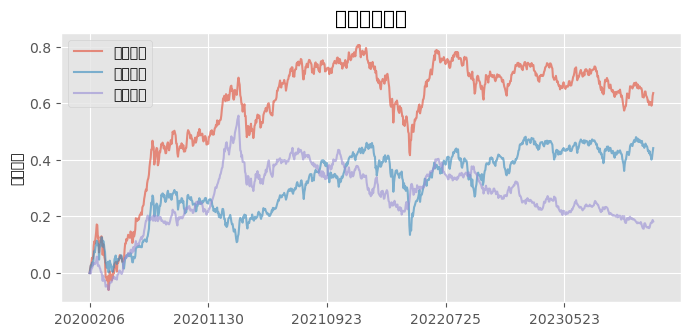

,指数收益,超额收益,策略收益
年化收益率,0.116,0.048,0.167
年化波动率,0.195,0.148,0.231
夏普率,0.595,0.324,0.724
最大回撤,-0.325,-0.399,-0.389
收益回撤比,0.357,0.120,0.430
胜率,0.535,0.515,0.531
盈亏比,0.959,0.991,0.994


(        指数收益   超额收益   策略收益
 年化收益率  0.116  0.048  0.167
 年化波动率  0.195  0.148  0.231
 夏普率    0.595  0.324  0.724
 最大回撤  -0.325 -0.399 -0.389
 收益回撤比  0.357  0.120  0.430
 胜率     0.535  0.515  0.531
 盈亏比    0.959  0.991  0.994,
                 策略     index          策略收益      指数收益      超额收益
 20200206  1.000000  1.000000  6.661338e-16  0.000000  0.000000
 20200207  1.016826  1.011439  1.668557e-02  0.011374  0.005372
 20200210  1.025927  1.027101  2.559636e-02  0.026740 -0.001183
 20200211  1.035929  1.021528  3.529847e-02  0.021300  0.013878
 20200212  1.055233  1.037904  5.376206e-02  0.037203  0.016478
 ...            ...       ...           ...       ...       ...
 20231225  1.828659  1.512281  6.035827e-01  0.413619  0.177695
 20231226  1.806101  1.492696  5.911702e-01  0.400584  0.178309
 20231227  1.817887  1.503532  5.976751e-01  0.407817  0.177576
 20231228  1.870445  1.531987  6.261763e-01  0.426565  0.187513
 20231229  1.888665  1.554877  6.358701e-01  0.441397  0.182298
 
 [951

In [12]:
ff.run(viotp1*ff.filter0, positions = 100, period = 1, fees = 0) 

波峰计数因子

In [13]:
def crest_fc(stock):
    try:
        volume = ff.read_min(stock)['volume']
        data = volume.rolling(240).mean() + volume.rolling(240).std()
        day_data = data[data.index.str.endswith('15:00:00')]
        judge_data = (pd.Series(volume.values - day_data.repeat(240).values,index = data.index))
        pre_data = judge_data.copy()
        pre_data[pre_data.index.str.endswith('15:00:00')] = 0
        crest = ((pre_data > 0).shift(1).replace({np.nan:False}).replace({False:True,True:np.nan}) * (judge_data > 0).replace({False:np.nan}))
        crest_sum = crest.replace({np.nan:0}).rolling(240).sum()
        crest_sum = crest_sum[crest_sum.index.str.endswith('15:00:00')]
        crest_sum.index = pd.to_datetime(crest_sum.index).strftime('%Y%m%d')
        return pd.Series(crest_sum,index = time_index).values
    except:
        return pd.Series(np.nan,index = time_index).values
with Pool(24) as p:
    res_lst = list(tqdm(p.imap(crest_fc,stock_index),total = len(stock_index)))
crest_result = pd.DataFrame(np.vstack(res_lst),index = stock_index,columns=time_index)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5545/5545 [01:45<00:00, 52.64it/s]


long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


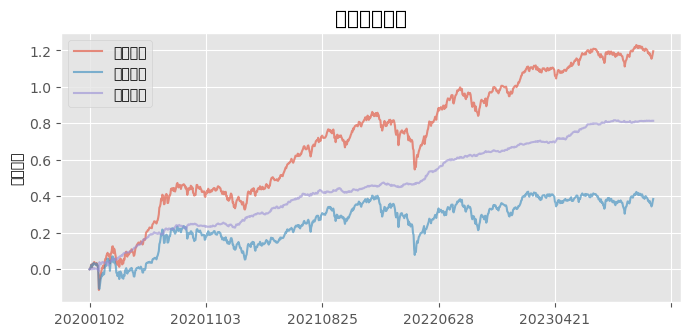

,指数收益,超额收益,策略收益
年化收益率,0.099,0.210,0.308
年化波动率,0.201,0.056,0.212
夏普率,0.495,3.776,1.452
最大回撤,-0.325,-0.028,-0.316
收益回撤比,0.305,7.482,0.976
胜率,0.534,0.581,0.578
盈亏比,0.948,1.464,0.934


(        指数收益   超额收益   策略收益
 年化收益率  0.099  0.210  0.308
 年化波动率  0.201  0.056  0.212
 夏普率    0.495  3.776  1.452
 最大回撤  -0.325 -0.028 -0.316
 收益回撤比  0.305  7.482  0.976
 胜率     0.534  0.581  0.578
 盈亏比    0.948  1.464  0.934,
                 策略     index          策略收益      指数收益      超额收益
 20200102  1.000000  1.000000  6.661338e-16  0.000000  0.000000
 20200103  1.004660  1.004611  4.648969e-03  0.004600  0.000049
 20200106  1.013310  1.011856  1.322196e-02  0.011786  0.001446
 20200107  1.026181  1.024789  2.584446e-02  0.024486  0.001367
 20200108  1.010610  1.011282  1.055394e-02  0.011218 -0.000629
 ...            ...       ...           ...       ...       ...
 20231225  3.214534  1.429845  1.167682e+00  0.357566  0.813628
 20231226  3.172962  1.411328  1.154666e+00  0.344531  0.813646
 20231227  3.201015  1.421573  1.163468e+00  0.351764  0.815227
 20231228  3.257965  1.448476  1.181103e+00  0.370512  0.814092
 20231229  3.307011  1.470119  1.196045e+00  0.385343  0.814205
 
 [970

In [14]:
ff.run(-crest_result*ff.filter0, positions = 100, period = 1, fees = 0) 

In [16]:
crest_result.loc[:,'20210104']

000001.SZ     6.0
000002.SZ    14.0
000004.SZ    17.0
000005.SZ    19.0
000006.SZ    14.0
             ... 
873706.BJ     NaN
873726.BJ     NaN
873806.BJ     NaN
873833.BJ     NaN
920002.BJ     NaN
Name: 20210104, Length: 5545, dtype: float64